<a href="https://colab.research.google.com/github/farhan1503001/Deep-Learning-Rhyme-Projects/blob/main/Visualizing_Filters_of_a_CNN_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualizing Filters of a Convolutional Neural Network

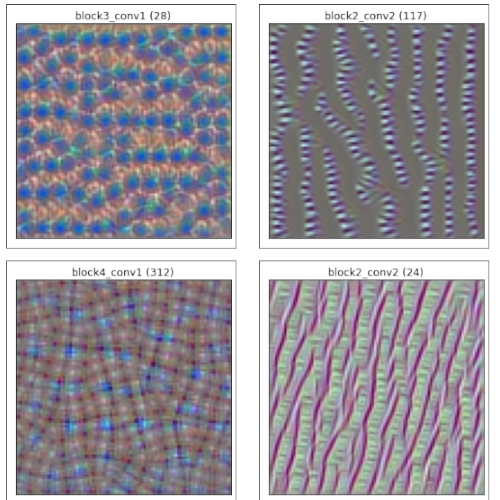

## Task 2: Downloading the Model

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#Printing the version of tensorflow
print('Tensorflow version ',tf.__version__)

Tensorflow version  2.4.1


In [2]:
model=tf.keras.applications.vgg16.VGG16(include_top=False,weights='imagenet',input_shape=(96,96,3))

58892288/58889256 [==============================] - 0s 0us/step


In [3]:
#Looking at the summary of the model
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)       0     

## Task 3: Get Layer Output

In [4]:
def visual_sub_model(layer_name):
  return tf.keras.models.Model(inputs=model.input,outputs=model.get_layer(layer_name).output)

#Checking with a layer name and finding out the model's summary
visual_sub_model('block1_conv2').summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


## Task 4: Image Visualization

In [5]:
def create_image():
  return tf.random.uniform(shape=(96,96,3),minval=0,maxval=1)#Created a random image
def plot_image(image,title='random'):
  image=image-tf.math.reduce_min(image)
  image=image/tf.math.reduce_max(image)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.title(title)
  plt.show()

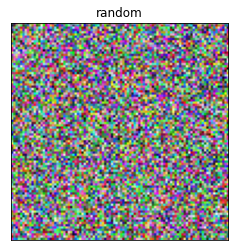

In [6]:
image=create_image()
plot_image(image)

In [7]:
import random
iters=50

## Task 5: Training Loop

In [9]:
def visualize_filter(layer_name,f_index=None,iters=50):
  submodel=visual_sub_model(layer_name=layer_name)
  filters=submodel.output.shape[-1]
  print(filters)
  f_index=random.randint(0,filters-1)
  print(f_index)
  img=create_image()
  verbose_step=int(iters/10)
  for i in range(iters):
    with tf.GradientTape() as tape:
      tape.watch(img)
      output=submodel(tf.expand_dims(img,axis=0))[:,:,:,f_index]
      loss=tf.math.reduce_mean(output)
    grads=tape.gradient(loss,img)
    grads=tf.math.l2_normalize(grads)
    img=img+grads*10
    if (i+1)%verbose_step:
      print(f'Iteration :{i+1},loss:{loss.numpy():.4f}')
  plot_image(img,f'{layer_name},{f_index}')


## Task 6: Final Results

In [10]:
print([layer.name for layer in model.layers if 'conv' in layer.name])

['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']


In [17]:
layer_name='block5_conv1' #@param ['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']

512
405
Iteration :1,loss:0.0462
Iteration :2,loss:1.1100
Iteration :3,loss:3.0986
Iteration :4,loss:5.2125
Iteration :5,loss:7.6526
Iteration :6,loss:10.4678
Iteration :7,loss:13.4100
Iteration :8,loss:15.7654
Iteration :9,loss:18.1482
Iteration :10,loss:20.3019
Iteration :11,loss:22.8902
Iteration :13,loss:27.5723
Iteration :14,loss:29.9821
Iteration :15,loss:32.5142
Iteration :16,loss:34.9622
Iteration :17,loss:37.7780
Iteration :18,loss:39.5399
Iteration :19,loss:42.5592
Iteration :20,loss:44.4704
Iteration :21,loss:47.2291
Iteration :22,loss:48.8957
Iteration :23,loss:51.9223
Iteration :25,loss:56.7484
Iteration :26,loss:58.9496
Iteration :27,loss:61.9088
Iteration :28,loss:64.6213
Iteration :29,loss:67.2412
Iteration :30,loss:69.9082
Iteration :31,loss:72.6604
Iteration :32,loss:75.2228
Iteration :33,loss:78.1726
Iteration :34,loss:80.6363
Iteration :35,loss:83.5027
Iteration :37,loss:88.5883
Iteration :38,loss:91.2878
Iteration :39,loss:94.2646
Iteration :40,loss:96.9147
Iterati

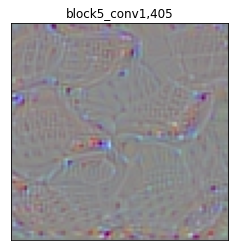

In [18]:
visualize_filter(layer_name=layer_name,iters=120)